# 📊 Análise de Auxílios Previdenciários - Novembro 2025

In [199]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [200]:
#Leitura do dataset auxilios tratado
auxilios = pd.read_csv('dados/dados_limpos.csv')
auxilios.head(4)

,Unnamed: 0,Tipos de auxilio,CID,Despacho,Data nasc,Sexo,Clientela,Vínculo dependentes,Forma Filiação,UF,Quant salarios minimos na RMI,Ramo Atividade,Pensão Alimenticia,Grau Instrução,Qt Anos Contribuição,Duração,Data DIB,Data DDB,Data DCB
0,0,Auxílio Doenca Previdenciário,D25.1 Leiomioma Intramural do Utero,Concessao com Analise Documental,1984-07-04,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.50,Comerciario,Sem Pensâo Alimentícia,Não Informado,9,14 days 00:00:00,2025-10-11,2025-11-01,2025-10-25 00:00:00.000000
1,1,Auxílio Doenca por Acidente do Trabalho,F33.1 Transt Depress Recorr Episodio Atual Mo,Concessao com Analise Documental,1990-09-01,Feminino,Urbano,Não Informado,Empregado,Alagoas,2.06,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,59 days 00:00:00,2025-10-31,2025-11-01,2025-12-29 00:00:00.000000
2,2,Auxílio Doenca Previdenciário,M23 Transt Internos dos Joelhos,Concessao com Analise Documental,1987-12-29,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,0,44 days 00:00:00,2025-10-30,2025-11-01,2025-12-13 00:00:00.000000
3,3,Auxílio Doenca Previdenciário,S92 Frat do Pe,Concessao com Analise Documental,1987-05-05,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.46,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,58 days 00:00:00,2025-10-22,2025-11-01,2025-12-19 00:00:00.000000


In [201]:
#Leitura do dataset de dados populacional tratado
populacao = pd.read_csv('dados/dados_populacional_limpo.csv')
populacao = populacao.sort_values('População_residente', ascending=False)
populacao.head()

,Unnamed: 0,Unidade da Federação,População_residente
19,19,São Paulo,46081801
16,16,Minas Gerais,21393441
18,18,Rio de Janeiro,17223547
15,15,Bahia,14870907
20,20,Paraná,11890517


## Plotagens - Pietra

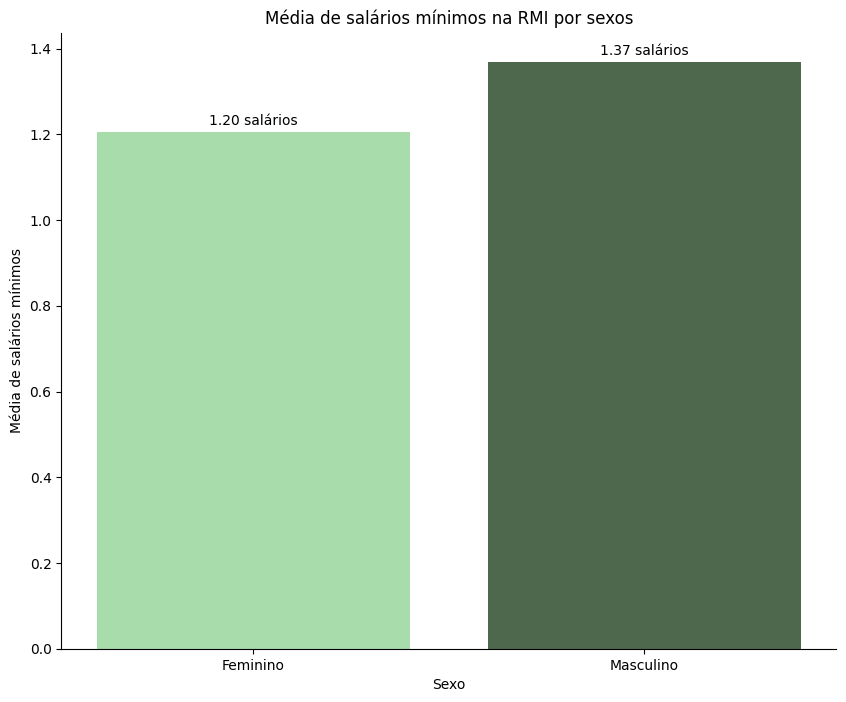

In [202]:
#pega a linha onde sexo = feminino e depois pega a quant de salarios dessas linhas
media_fem = auxilios.loc[auxilios['Sexo'] == 'Feminino', 'Quant salarios minimos na RMI'].mean()
media_masc = auxilios.loc[auxilios['Sexo'] == 'Masculino', 'Quant salarios minimos na RMI'].mean()

diferenca = abs(media_fem - media_masc)

fig, ax = plt.subplots(figsize=(10, 8))

barras = ax.bar(['Feminino', 'Masculino'],
    [media_fem, media_masc],
    color=['#A8DCAB', '#4E684E']
)

ax.set_title('Média de salários mínimos na RMI por sexos')
ax.set_xlabel('Sexo')
ax.set_ylabel('Média de salários mínimos')
ax.bar_label(barras, fmt='%.2f salários', padding=3)

ax.spines['top'].set_visible(False) #borda
ax.spines['right'].set_visible(False) 

plt.show()


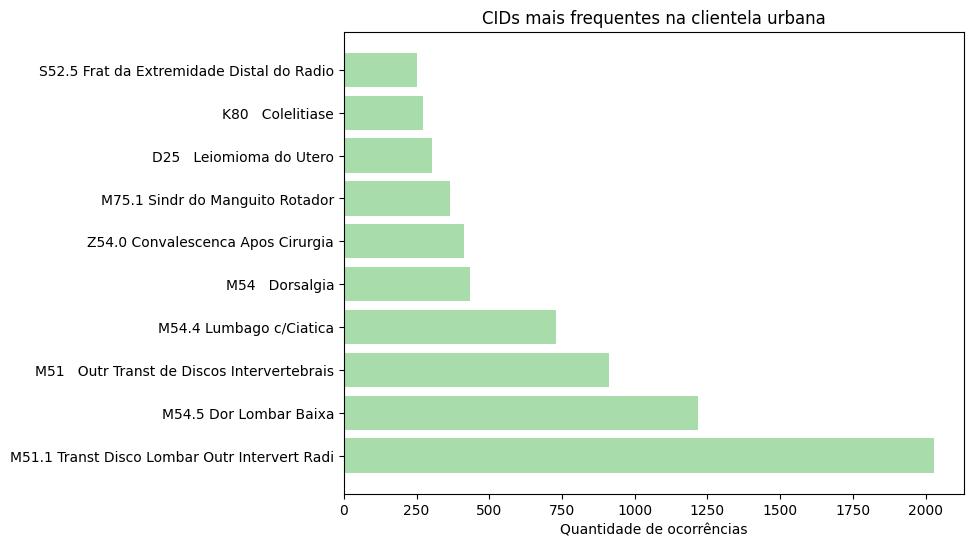

In [203]:
#filtrando e tirando os cid 'vazios'
cli_urbana = auxilios.loc[auxilios['Clientela'] == 'Rural', 'CID']
cli_urbana = cli_urbana[~cli_urbana.isin(['Zerados', 'Em Branco', '{ñ class}'])] #mantem somente os CIDs que nao estao nessa condição

contagem = cli_urbana.value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(contagem.index,
        contagem.values,
        color='#A8DCAB'
        )
plt.title('CIDs mais frequentes na clientela urbana')
plt.xlabel('Quantidade de ocorrências')

plt.show()


In [204]:
proporcao = (auxilios.groupby('UF')['Forma Filiação'] #agrupa por uf, pega a coluna forma filiação
                        .value_counts(normalize=True) #normaliza para retornar as proporções
                        .unstack(fill_value=0) #Antes retornava uma Series, que tem indice multinivel, as linhas eram combinações de UF e de Forma de Filiação, e agora é um DataFrame, com as linhas sendo os uf e as colunas as formas de filiação. E coloca 0 
                        ) 
proporcao

Forma Filiação,Autônomo,Desempregado,Doméstico,Empregado,Empresário,Equiparado a Autônomo,Facultativo,Optante Pela Lei 6.184/74,Segurado Especial,Trabalhador Avulso
UF,,,,,,,,,,
Acre,0.105061,0.203520,0.018152,0.449945,0.000000,0.000000,0.020902,0.000550,0.201870,0.000000
Alagoas,0.207575,0.242546,0.021595,0.284126,0.000000,0.000000,0.057373,0.000645,0.185012,0.001128
Amapá,0.059161,0.199885,0.013211,0.304997,0.000000,0.000000,0.018380,0.000000,0.403791,0.000574
Amazonas,0.082340,0.221946,0.013694,0.267829,0.000178,0.000000,0.021519,0.000000,0.391962,0.000534
Bahia,0.135217,0.199045,0.016023,0.226582,0.000080,0.000000,0.048839,0.000106,0.373790,0.000318
Ceará,0.148723,0.262336,0.014481,0.233821,0.000198,0.000000,0.050632,0.000099,0.289164,0.000545
Distrito Federal,0.297753,0.190698,0.032075,0.153216,0.000070,0.000000,0.120459,0.000000,0.205397,0.000332
Espírito Santo,0.228418,0.225097,0.025761,0.373254,0.000343,0.000000,0.033776,0.000000,0.110946,0.002404
Goiás,0.217196,0.216929,0.026564,0.366143,0.000000,0.000000,0.029307,0.000000,0.143125,0.000736


In [205]:
coordenadas_uf = {
    'Acre': [-9.0238, -70.812],   'Alagoas': [-9.5713, -36.782],
    'Amapá': [0.9020, -52.003],    'Amazonas': [-3.4168, -65.8561],
    'Bahia': [-12.5797, -41.7007], 'Ceará': [-5.4984, -39.3206],
    'Distrito Federal': [-15.7801, -47.9292], 'Espírito Santo': [-19.1834, -40.3089],
    'Goiás': [-15.8270, -49.8362], 'Maranhão': [-4.9609, -45.2744],
    'Mato Grosso': [-12.6819, -56.9211], 'Mato Grosso do Sul': [-20.7722, -54.7852],
    'Minas Gerais': [-18.5122, -44.555],  'Pará': [-1.9981, -54.9306],
    'Paraíba': [-7.2399, -36.782],   'Paraná': [-24.89, -51.55],
    'Pernambuco': [-8.8137, -36.9541],  'Piauí': [-6.6695, -42.28],
    'Rio de Janeiro': [-22.9099, -43.2095], 'Rio Grande do Norte': [-5.4026, -36.9541],
    'Rio Grande do Sul': [-30.0346, -51.2177], 'Rondônia': [-10.83, -63.34],
    'Roraima': [2.7376, -62.0751],   'Santa Catarina': [-27.2423, -50.2189],
    'Sergipe': [-10.5741, -37.3857], 'São Paulo': [-23.5505, -46.6333],
    'Tocantins': [-10.1753, -48.2982]
}


In [206]:
cores_filiacao = {
    'Autônomo': '#E74C3C',           # Vermelho vibrante
    'Desempregado': '#3498DB',       # Azul royal
    'Doméstico': '#1ABC9C',          # Verde turquesa
    'Empregado': '#673AB7',          # Roxo escuro 
    'Empresário': '#F39C12',         # Laranja forte
    'Equiparado a Autônomo': '#95A5A6',  # Cinza médio
    'Facultativo': '#E91E63',        # Rosa pink
    'Optante Pela Lei 6.184/74': '#9B59B6',  # Roxo 
    'Segurado Especial': '#FF9800',  # Laranja âmbar
    'Trabalhador Avulso': '#2ECC71'  # Verde esmeralda 
}

In [207]:
import io #para usar streams de dados na memória (sem precisar salvar arquivos no disco)
import base64 #para codificar dados binários (como imagens) em texto

def criar_grafico_pizza(valores, labels): #valores = proporções ----- labels = categorias
    cores = [cores_filiacao.get(label, '#CCCCCC') for label in labels]
    
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.pie(valores, labels=None, startangle=90, colors=cores)
    ax.axis('equal') #circulo e nao oval
    
    buffer = io.BytesIO() #maquina virtual, não salva no disco, só na memória temporária

    plt.savefig(buffer, format='png', bbox_inches='tight', transparent=True) #bbox_inches='tight' -> remove espaços em branco ao redor do gráfico
    buffer.seek(0) #rebobina buffer para o inicio
    plt.close(fig)
    
    imagem_base64 = base64.b64encode(buffer.read()).decode() #o buffer le as dados binarios da imagem, converte em texto e transforma de byte para string
    return f'data:image/png;base64,{imagem_base64}' #retorna a string formatada e cola a strind da imagem


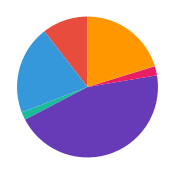
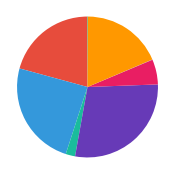
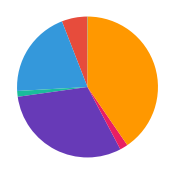
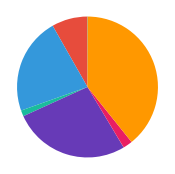
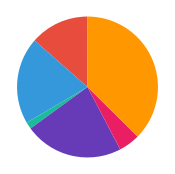
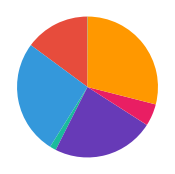
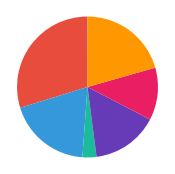
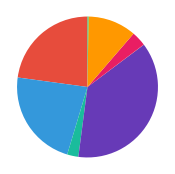
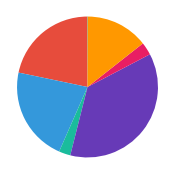
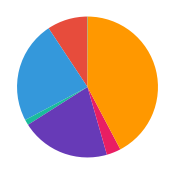
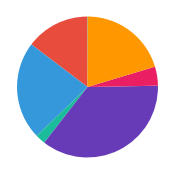
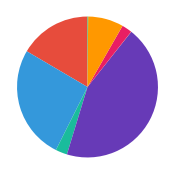
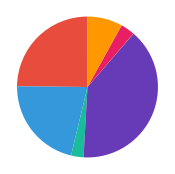
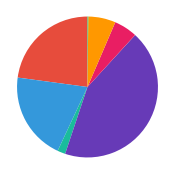
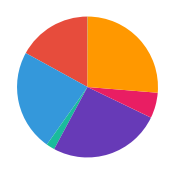
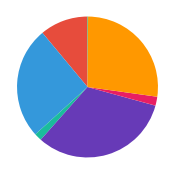
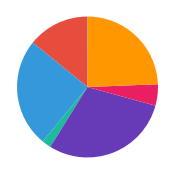
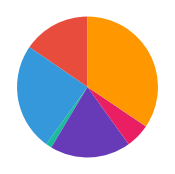
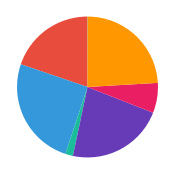
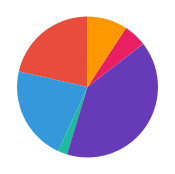
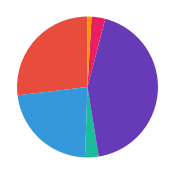
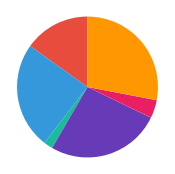
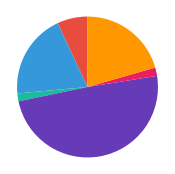
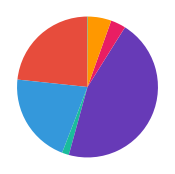
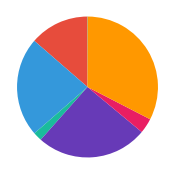
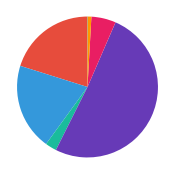
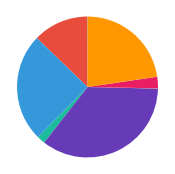

In [208]:
import folium #biblioteca de mapa interativo

mapa = folium.Map(
    location=[-15.7801, -47.9292],
    zoom_start=4,
    tiles='OpenStreetMap'
)

for uf_nome in proporcao.index: #percorre cada UF que está no índice do dataframe proporcao
    if uf_nome in coordenadas_uf:
        valores = proporcao.loc[uf_nome] #pega as proporções de cada forma de filiação naquele estado e retorna uma Serie
        valores = valores[valores > 0]
        
        if len(valores) > 0:
            #gera o gráfico
            #values = numeros/proporcoes ----- index = nomes das categotias
            imagem = criar_grafico_pizza(valores.values, valores.index)
            
            #cria tabela do popup
            tabela_html = '<table style="width:100%; font-size:11px;">'

            #legenda do popup
            for label, valor in zip(valores.index, valores.values): #label recebe o nome e valor o numero. O zip junta as duas listas, como se fosse uma tupla(pares) 
                cor = cores_filiacao.get(label, '#CCC')
                tabela_html += f'''
                <tr>
                    <!--faz o quadradinho colorido-->
                    <td><span style="background:{cor}; width:12px; height:12px;
                                     display:inline-block; border:1px solid #000;"></span></td>

                    <!--nome da categoria-->
                    <td>{label}</td>

                    <!--a porcentagem-->
                    <td style="text-align:right;"><b>{valor*100:.1f}%</b></td>
                </tr>
                '''
            tabela_html += '</table>'
            
            #conteudo do popup
            popup_html = f'''
            <!--div que vai agrupar, alinhando no centro e com tamanho minimo-->
            <div style="text-align:center; min-width:250px;">
                <!--titulo com o estado-->
                <h4 style="margin:5px 0;">{uf_nome}</h4>

                <!--grafico de pizza-->
                <img src="{imagem}" width="150" height="150">

                <!--linha horizontal para dividir-->
                <hr style="margin:10px 0;">

                <!--insere conteudo da variavel -> que é a legenda-->
                {tabela_html}
            </div>
            '''

            #adiciona um círculo no mapa
            folium.CircleMarker(
                location=coordenadas_uf[uf_nome],
                radius=5,
                color='#4E684E',
                fill=True,
                fillColor='#A8DCAB',
                fillOpacity=0.6,
                popup=folium.Popup(popup_html, max_width=250)
            ).add_to(mapa)
            
mapa

## Plotagens - Sabrina

## SEPARAÇÃO E ORGANIZAÇÃO DE DADOS

In [209]:
#Organiza o df em ordem decrescente
populacao = populacao.sort_values('População_residente', ascending=False)

In [210]:
#Cria e calcula a duração do auxilio
auxilios['Data DIB'] = pd.to_datetime(auxilios['Data DIB'])
auxilios['Data DCB'] = pd.to_datetime(auxilios['Data DCB'])

auxilios['Duração'] = auxilios['Data DCB'] - auxilios['Data DIB']
auxilios['Duração'].head(4)

0   14 days
1   59 days
2   44 days
3   58 days
Name: Duração, dtype: timedelta64[ns]

In [211]:
#Criando e calculando a coluna Idade
auxilios['Data nasc'] = pd.to_datetime(auxilios['Data nasc'])
auxilios['Idade'] = ((auxilios['Data DIB'] - auxilios['Data nasc']).dt.days / 365).round(0).astype('Int64')
auxilios

,Unnamed: 0,Tipos de auxilio,CID,Despacho,Data nasc,Sexo,Clientela,Vínculo dependentes,Forma Filiação,UF,Quant salarios minimos na RMI,Ramo Atividade,Pensão Alimenticia,Grau Instrução,Qt Anos Contribuição,Duração,Data DIB,Data DDB,Data DCB,Idade
0,0,Auxílio Doenca Previdenciário,D25.1 Leiomioma Intramural do Utero,Concessao com Analise Documental,1984-07-04,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.50,Comerciario,Sem Pensâo Alimentícia,Não Informado,9,14 days 00:00:00,2025-10-11,2025-11-01,2025-10-25 00:00:00.000000,41
1,1,Auxílio Doenca por Acidente do Trabalho,F33.1 Transt Depress Recorr Episodio Atual Mo,Concessao com Analise Documental,1990-09-01,Feminino,Urbano,Não Informado,Empregado,Alagoas,2.06,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,59 days 00:00:00,2025-10-31,2025-11-01,2025-12-29 00:00:00.000000,35
2,2,Auxílio Doenca Previdenciário,M23 Transt Internos dos Joelhos,Concessao com Analise Documental,1987-12-29,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,0,44 days 00:00:00,2025-10-30,2025-11-01,2025-12-13 00:00:00.000000,38
3,3,Auxílio Doenca Previdenciário,S92 Frat do Pe,Concessao com Analise Documental,1987-05-05,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.46,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,58 days 00:00:00,2025-10-22,2025-11-01,2025-12-19 00:00:00.000000,38
4,4,Auxílio Doenca Previdenciário,M51.1 Transt Disco Lombar Outr Intervert Radi,Concessao com Analise Documental,1991-03-08,Masculino,Urbano,Não Informado,Desempregado,Alagoas,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,2,59 days 00:00:00,2025-10-23,2025-11-01,2025-12-21 00:00:00.000000,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580798,584916,Auxílio Doenca Previdenciário,F41.2 Transt Misto Ansioso e Depressivo,Concessao com Analise Documental,1997-10-04,Feminino,Urbano,Não Informado,Desempregado,Tocantins,1.08,Comerciario,Sem Pensâo Alimentícia,Não Informado,2,29 days 00:00:00,2025-11-24,2025-11-29,2025-12-23 00:00:00.000000,28
580799,584917,Auxílio Doenca Previdenciário,N80 Endometriose,Concessao com Analise Documental,1988-07-24,Feminino,Urbano,Não Informado,Empregado,Tocantins,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,6,44 days 00:00:00,2025-11-19,2025-11-29,2026-01-02 00:00:00.000000,37
580800,584918,Auxílio Doenca Previdenciário,G56.0 Sindr do Tunel do Carpo,Concessao com Analise Documental,1973-11-23,Feminino,Urbano,Não Informado,Autônomo,Tocantins,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,59 days 00:00:00,2025-10-27,2025-11-29,2025-12-25 00:00:00.000000,52
580801,584919,Amp. Social Pessoa Portadora Deficiencia,Zerados,Concessao Decorrente de Acao Judicial,1978-02-13,Masculino,Rural,Não Informado,Desempregado,Tocantins,1.00,Rural,Sem Pensâo Alimentícia,Não Informado,0,556 days 13:30:42.874522,2024-08-13,2025-11-29,2026-02-20 13:30:42.874522,47


In [212]:
#Cria um df com a quantidade de auxilios distibuidos no estado
df_auxilios_por_UF = auxilios['UF'].value_counts().reset_index()
df_auxilios_por_UF.columns = ['UF', 'Total de Auxilios Concedidos']
df_auxilios_por_UF = df_auxilios_por_UF.sort_values('Total de Auxilios Concedidos', ascending=False)
df_auxilios_por_UF

,UF,Total de Auxilios Concedidos
0,São Paulo,115577
1,Minas Gerais,65987
2,Distrito Federal,57148
3,Rio Grande do Sul,39089
4,Bahia,37695
5,Rio de Janeiro,34372
6,Paraná,32615
7,Santa Catarina,31726
8,Pernambuco,20793
9,Ceará,20165


In [213]:
#Cria df com percentual de auxilios concedidos em comparação com a população
comparacao = pd.merge(df_auxilios_por_UF, populacao, left_on='UF',right_on='Unidade da Federação')
comparacao['porcentagem_auxilio'] = ((comparacao['Total de Auxilios Concedidos'] / comparacao['População_residente']) * 100).round(2)
comparacao = comparacao.sort_values('porcentagem_auxilio', ascending=False)
comparacao

,UF,Total de Auxilios Concedidos,Unnamed: 0,Unidade da Federação,População_residente,porcentagem_auxilio
2,Distrito Federal,57148,26,Distrito Federal,2996899,1.91
7,Santa Catarina,31726,21,Santa Catarina,8187029,0.39
3,Rio Grande do Sul,39089,22,Rio Grande do Sul,11233263,0.35
1,Minas Gerais,65987,16,Minas Gerais,21393441,0.31
16,Mato Grosso do Sul,9028,23,Mato Grosso do Sul,2924631,0.31
12,Paraíba,12064,11,Paraíba,4164468,0.29
6,Paraná,32615,20,Paraná,11890517,0.27
15,Piauí,9120,8,Piauí,3384547,0.27
14,Mato Grosso,9834,24,Mato Grosso,3893659,0.25
0,São Paulo,115577,19,São Paulo,46081801,0.25


In [214]:
#Cria df somente com dados de mulheres
df_mulheres = auxilios[auxilios['Sexo'] == 'Feminino']
df_mulheres

,Unnamed: 0,Tipos de auxilio,CID,Despacho,Data nasc,Sexo,Clientela,Vínculo dependentes,Forma Filiação,UF,Quant salarios minimos na RMI,Ramo Atividade,Pensão Alimenticia,Grau Instrução,Qt Anos Contribuição,Duração,Data DIB,Data DDB,Data DCB,Idade
0,0,Auxílio Doenca Previdenciário,D25.1 Leiomioma Intramural do Utero,Concessao com Analise Documental,1984-07-04,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.50,Comerciario,Sem Pensâo Alimentícia,Não Informado,9,14 days 00:00:00,2025-10-11,2025-11-01,2025-10-25 00:00:00.000000,41
1,1,Auxílio Doenca por Acidente do Trabalho,F33.1 Transt Depress Recorr Episodio Atual Mo,Concessao com Analise Documental,1990-09-01,Feminino,Urbano,Não Informado,Empregado,Alagoas,2.06,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,59 days 00:00:00,2025-10-31,2025-11-01,2025-12-29 00:00:00.000000,35
2,2,Auxílio Doenca Previdenciário,M23 Transt Internos dos Joelhos,Concessao com Analise Documental,1987-12-29,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,0,44 days 00:00:00,2025-10-30,2025-11-01,2025-12-13 00:00:00.000000,38
3,3,Auxílio Doenca Previdenciário,S92 Frat do Pe,Concessao com Analise Documental,1987-05-05,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.46,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,58 days 00:00:00,2025-10-22,2025-11-01,2025-12-19 00:00:00.000000,38
6,6,Auxílio Doenca Previdenciário,F41 Outr Transt Ansiosos,Concessao com Analise Documental,1972-10-09,Feminino,Urbano,Não Informado,Autônomo,Alagoas,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,1,59 days 00:00:00,2025-10-24,2025-11-01,2025-12-22 00:00:00.000000,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580797,584915,Pensão por Morte Previdenciária,Zerados,Concessao Normal,1967-09-13,Feminino,Rural,Cônjuge,Segurado Especial,Tocantins,1.00,Rural,Sem Pensâo Alimentícia,5ª. a 8ª. Série Incompl. do 1º. Grau (Ginás,0,337 days 13:30:42.874522,2025-03-20,2025-11-29,2026-02-20 13:30:42.874522,58
580798,584916,Auxílio Doenca Previdenciário,F41.2 Transt Misto Ansioso e Depressivo,Concessao com Analise Documental,1997-10-04,Feminino,Urbano,Não Informado,Desempregado,Tocantins,1.08,Comerciario,Sem Pensâo Alimentícia,Não Informado,2,29 days 00:00:00,2025-11-24,2025-11-29,2025-12-23 00:00:00.000000,28
580799,584917,Auxílio Doenca Previdenciário,N80 Endometriose,Concessao com Analise Documental,1988-07-24,Feminino,Urbano,Não Informado,Empregado,Tocantins,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,6,44 days 00:00:00,2025-11-19,2025-11-29,2026-01-02 00:00:00.000000,37
580800,584918,Auxílio Doenca Previdenciário,G56.0 Sindr do Tunel do Carpo,Concessao com Analise Documental,1973-11-23,Feminino,Urbano,Não Informado,Autônomo,Tocantins,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,59 days 00:00:00,2025-10-27,2025-11-29,2025-12-25 00:00:00.000000,52


In [215]:
#Cria df somente com dados de homens
df_homens = auxilios[auxilios['Sexo'] == 'Masculino']
df_homens

,Unnamed: 0,Tipos de auxilio,CID,Despacho,Data nasc,Sexo,Clientela,Vínculo dependentes,Forma Filiação,UF,Quant salarios minimos na RMI,Ramo Atividade,Pensão Alimenticia,Grau Instrução,Qt Anos Contribuição,Duração,Data DIB,Data DDB,Data DCB,Idade
4,4,Auxílio Doenca Previdenciário,M51.1 Transt Disco Lombar Outr Intervert Radi,Concessao com Analise Documental,1991-03-08,Masculino,Urbano,Não Informado,Desempregado,Alagoas,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,2,59 days 00:00:00,2025-10-23,2025-11-01,2025-12-21 00:00:00.000000,35
5,5,Auxílio Doenca Previdenciário,M19.9 Artrose Ne,Concessao com Analise Documental,1985-10-03,Masculino,Urbano,Não Informado,Empregado,Alagoas,1.39,Comerciario,Sem Pensâo Alimentícia,Não Informado,13,44 days 00:00:00,2025-10-25,2025-11-01,2025-12-08 00:00:00.000000,40
9,9,Auxílio Doenca Previdenciário,M50.2 Outr Deslocamento de Disco Cervical,Concessao com Analise Documental,1978-04-22,Masculino,Urbano,Não Informado,Desempregado,Alagoas,1.71,Comerciario,Sem Pensâo Alimentícia,Não Informado,18,27 days 00:00:00,2025-10-25,2025-11-01,2025-11-21 00:00:00.000000,48
11,11,Auxílio Doenca Previdenciário,M25.5 Dor Articular,Concessao com Analise Documental,1992-02-14,Masculino,Urbano,Não Informado,Desempregado,Alagoas,3.46,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,35 days 00:00:00,2025-10-23,2025-11-01,2025-11-27 00:00:00.000000,34
12,12,Auxílio Doenca Previdenciário,I50 Insuf Cardiaca,Concessao com Analise Documental,1970-10-22,Masculino,Urbano,Não Informado,Empregado,Alagoas,1.22,Comerciario,Sem Pensâo Alimentícia,Não Informado,20,55 days 00:00:00,2025-10-12,2025-11-01,2025-12-06 00:00:00.000000,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580788,584906,Amp. Social Pessoa Portadora Deficiencia,Zerados,Concessao Decorrente de Acao Judicial,2002-11-26,Masculino,Urbano,Não Informado,Desempregado,Tocantins,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,0,559 days 13:30:42.874522,2024-08-10,2025-11-29,2026-02-20 13:30:42.874522,22
580790,584908,Aposentadoria Invalidez Previdenciária,M54.5 Dor Lombar Baixa,Concessao Normal,1967-10-04,Masculino,Rural,Não Informado,Segurado Especial,Tocantins,1.00,Rural,Sem Pensâo Alimentícia,Não Informado,0,85 days 13:30:42.874522,2025-11-27,2025-11-29,2026-02-20 13:30:42.874522,58
580792,584910,Aposentadoria Invalidez Previdenciária,C20 Neopl Malig do Reto,Concessao Normal,1985-04-17,Masculino,Urbano,Não Informado,Autônomo,Tocantins,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,0,85 days 13:30:42.874522,2025-11-27,2025-11-29,2026-02-20 13:30:42.874522,41
580794,584912,Auxílio Doenca Previdenciário,S06.9 Traum Intracraniano Ne,Conc. Base Artigo 27 Inciso Ii do Rbps,2001-11-25,Masculino,Urbano,Não Informado,Empregado,Tocantins,1.25,Comerciario,Sem Pensâo Alimentícia,Não Informado,4,68 days 00:00:00,2025-10-28,2025-11-30,2026-01-04 00:00:00.000000,24


In [216]:
#Cria df com total de auxilios por gênero em cada estado
df_generos_por_UF = (auxilios.groupby(['UF', 'Sexo'])
                     .size()
                     .reset_index(name='Total de Auxilios Concedidos'))
df_generos_por_UF

,UF,Sexo,Total de Auxilios Concedidos
0,Acre,Feminino,935
1,Acre,Masculino,883
2,Alagoas,Feminino,3367
3,Alagoas,Masculino,2838
4,Amapá,Feminino,1087
5,Amapá,Masculino,654
6,Amazonas,Feminino,3514
7,Amazonas,Masculino,2109
8,Bahia,Feminino,22165
9,Bahia,Masculino,15530


In [217]:
#Cria DF com Tipos de auxilio mais concedidos por estado
tipos_por_UF = auxilios.groupby(['Tipos de auxilio','UF']).size().reset_index(name='Quantidade')
tipos_por_UF = tipos_por_UF.sort_values('Quantidade', ascending=False)
tipos_por_UF

,Tipos de auxilio,UF,Quantidade
286,Auxílio Doenca Previdenciário,São Paulo,78937
273,Auxílio Doenca Previdenciário,Minas Gerais,47888
160,Aposentadoria por Idade,Distrito Federal,27513
280,Auxílio Doenca Previdenciário,Rio Grande do Sul,27229
284,Auxílio Doenca Previdenciário,Santa Catarina,23323
...,...,...,...
405,Pensão por Morte Acidente do Trabalho,Mato Grosso do Sul,1
412,Pensão por Morte Acidente do Trabalho,Sergipe,1
441,Pensão por Morte de Ex-Combatente,Rio Grande do Sul,1
442,Pensão por Morte de Ex-Combatente,Rio de Janeiro,1


In [218]:
#Cria um df com a média de dias de duração de beneficio por profissão
df_media_profissao = auxilios.groupby('Ramo Atividade')['Duração'].mean().reset_index()
df_media_profissao['Duração'] = df_media_profissao['Duração'].dt.days
df_media_profissao = df_media_profissao.sort_values('Duração', ascending=False)
df_media_profissao

,Ramo Atividade,Duração
3,Industriario,4159
2,Ferroviario,3965
0,Bancario,3230
5,Maritimo,1273
8,Transportes e Carga,1269
4,Irrelevante,608
7,Servidor Publico,583
6,Rural,268
1,Comerciario,188


In [219]:
#Cria um df com o tipo de auxilio e sua duração
df_media_categoria = auxilios.groupby('Tipos de auxilio')['Duração'].mean().reset_index()
df_media_categoria['Duração'] = df_media_categoria['Duração'].dt.days
df_media_categoria = df_media_categoria.sort_values('Duração', ascending=False)
df_media_categoria

,Tipos de auxilio,Duração
24,Pensão por Morte de Trabalhador Rural,12938
16,Auxílio Suplementar Acidente Trabalho,11090
23,Pensão por Morte de Ex-Combatente,4107
19,Pensão Vitalícia Dependentes Seringueiro,3218
4,Aposentadoria Especial,2706
9,Auxílio Acidente,2292
10,Auxílio Acidente Previdenciário,1597
14,Auxílio Reclusão,1093
2,Aposent. Invalidez Acidente Trabalho,935
18,Pensao Especial Hanseniase Lei 11520/07,888


In [220]:
#Cria dataframes separados para comparar

graus_instrucao_alto = {
    'Superior Completo',
    'Superior Incompleto',
}

df_instrucao_alta = auxilios[
    auxilios['Grau Instrução'].isin(graus_instrucao_alto)
]
grau_instrucao_baixo = {
    '5ª. a 8ª. Série Incompl. do 1º. Grau   (Ginás',
    '2º. Grau (Colegial) Completo',
    '1º. Grau (Ginasial) Completo',
    '2º. Grau (Colegial) Incompleto',
    'Analfabeto',
    'Ate 4ª. Série 1º. Grau(Primário) Incompleta',
    '4ª. Série 1ª. Grau Completa'
}

df_instrucao_baixa = auxilios[
    auxilios['Grau Instrução'].isin(grau_instrucao_baixo)
]

In [221]:
#Cria df com top5 auxilios mais concedidos
top5_geral = auxilios['Tipos de auxilio'].value_counts().head(5).reset_index()
top5_geral.columns = ['Tipo', 'Total de Auxílios']
top5_geral['Categoria'] = 'Geral'
top5_geral


,Tipo,Total de Auxílios,Categoria
0,Auxílio Doenca Previdenciário,344738,Geral
1,Auxílio Salario Maternidade,69061,Geral
2,Aposentadoria por Idade,52823,Geral
3,Pensão por Morte Previdenciária,26736,Geral
4,Auxílio Doenca por Acidente do Trabalho,23001,Geral


In [222]:
#Cria df com top5 auxilios mais concedidos para mulheres
top5_mulheres = (auxilios[auxilios['Sexo'] == 'Feminino']['Tipos de auxilio']
                 .value_counts()
                 .head(5)
                 .reset_index())
top5_mulheres.columns = ['Tipo', 'Total de Auxílios']
top5_mulheres['Categoria'] = 'Feminino'
top5_mulheres#Cria df com top5 auxilios mais concedidos para mulheres
top5_mulheres = (auxilios[auxilios['Sexo'] == 'Feminino']['Tipos de auxilio']
                 .value_counts()
                 .head(5)
                 .reset_index())
top5_mulheres.columns = ['Tipo', 'Total de Auxílios']
top5_mulheres['Categoria'] = 'Feminino'
top5_mulheres

,Tipo,Total de Auxílios,Categoria
0,Auxílio Doenca Previdenciário,180359,Feminino
1,Auxílio Salario Maternidade,69025,Feminino
2,Aposentadoria por Idade,30464,Feminino
3,Pensão por Morte Previdenciária,19110,Feminino
4,Amp. Social Pessoa Portadora Deficiencia,8940,Feminino


In [223]:
#Cria df com top5 auxilios mais concedidos para homens
top5_homens = (auxilios[auxilios['Sexo'] == 'Masculino']['Tipos de auxilio']
               .value_counts()
               .head(5)
               .reset_index())
top5_homens.columns = ['Tipo', 'Total de Auxílios']
top5_homens['Categoria'] = 'Masculino'
top5_homens

,Tipo,Total de Auxílios,Categoria
0,Auxílio Doenca Previdenciário,164379,Masculino
1,Aposentadoria por Idade,22359,Masculino
2,Auxílio Doenca por Acidente do Trabalho,15072,Masculino
3,Amp. Social Pessoa Portadora Deficiencia,12643,Masculino
4,Aposentadoria Invalidez Previdenciária,10510,Masculino


In [224]:
#Calcula a média de duração dos auxilios
media_duracao_auxilios = auxilios['Duração'].mean()
media_duracao_auxilios = media_duracao_auxilios.days

print(f"Média de duração dos auxilios: {media_duracao_auxilios} dias")

Média de duração dos auxilios: 214 dias


In [225]:
#Calcula a media de duração de auxilio para mulheres
media_duracao_mulheres = auxilios[auxilios['Sexo'] == 'Feminino']['Duração'].mean()
media_duracao_mulheres = media_duracao_mulheres.days

print(f"Média de Duração do Auxilio para o Público Feminino: {media_duracao_mulheres} dias")

Média de Duração do Auxilio para o Público Feminino: 186 dias


In [226]:
#Calcula a média de duração de auxilio para homens
media_duracao_homens = auxilios[auxilios['Sexo'] == 'Masculino']['Duração'].mean()
media_duracao_homens = media_duracao_homens.days

print(f"Média de Duração do Auxilio para o Público Masculino: {media_duracao_homens} dias")

Média de Duração do Auxilio para o Público Masculino: 253 dias


In [227]:
#Calcula o total de auxilios concedidos para mulheres
total_auxilios_mulheres = (auxilios['Sexo'] == 'Feminino').sum()
print(f"Total de Auxílios concedidos para mulheres: {total_auxilios_mulheres}")

Total de Auxílios concedidos para mulheres: 332974


In [228]:
#Calcula o total de auxilios concedidos para homens
total_auxilios_homens = (auxilios['Sexo'] == 'Masculino').sum()
print(f"Total de Auxílios concedidos para homens: {total_auxilios_homens}")

Total de Auxílios concedidos para homens: 247829


In [229]:
#Calcula o total de auxilios concedidos
total_auxilios = len(auxilios)
print(f"Total de Auxílios concedidos: {total_auxilios}")

Total de Auxílios concedidos: 580803


In [230]:
#Cria df juntando os calculos feitos por genero em um df
juncao_medidas_genero = pd.DataFrame({
    'Categoria': ['Feminino', 'Masculino'],
    'Total de Auxílios': [total_auxilios_mulheres, total_auxilios_homens],
    'Média de Duração': [media_duracao_mulheres, media_duracao_homens]
    
})
juncao_medidas_genero

,Categoria,Total de Auxílios,Média de Duração
0,Feminino,332974,186
1,Masculino,247829,253


In [231]:
#Calcula a média de duração dos benefícios para pessoas com alta instrução
media_duracao_instrucao_alta = df_instrucao_alta['Duração'].mean()
media_duracao_instrucao_alta = media_duracao_instrucao_alta.days

print(f"Média de Duração do Auxilio para pessoas com alta instrução: {media_duracao_instrucao_alta} dias")

Média de Duração do Auxilio para pessoas com alta instrução: 311 dias


In [232]:
#Calcula a média de duração dos benefícios para pessoas com baixa instrução
media_duracao_instrucao_baixa = df_instrucao_baixa['Duração'].mean()
media_duracao_instrucao_baixa = media_duracao_instrucao_baixa.days

print(f"Média de Duração do Auxilio para pessoas com baixa instrução: {media_duracao_instrucao_baixa} dias")

Média de Duração do Auxilio para pessoas com baixa instrução: 400 dias


In [233]:
#Calcula a média de salarios minimos para pessoas com alta instrução
media_instrucao_alta = df_instrucao_alta['Quant salarios minimos na RMI'].mean()
print(f'Média de Quantidade de Salarios Minimos na RMI para pessoas com alta instrução: {media_instrucao_alta}')

Média de Quantidade de Salarios Minimos na RMI para pessoas com alta instrução: 1.9716473780828478


In [234]:
#Calcula a média de salarios minimos para pessoas com baixa instrução
media_instrucao_baixa = df_instrucao_baixa['Quant salarios minimos na RMI'].mean()
print(f'Média de Quantidade de Salarios Minimos na RMI para pessoas com baixa instrução: {media_instrucao_baixa}')

Média de Quantidade de Salarios Minimos na RMI para pessoas com baixa instrução: 1.2068552814041078


In [235]:
#Calcula a média de RMI - Realmete necessário(?)
media_rmi = auxilios['Quant salarios minimos na RMI'].mean()
print(f'Média de Quantidade de Salarios Minimos na RMI: {media_rmi}')

Média de Quantidade de Salarios Minimos na RMI: 1.2747402475538177


In [236]:
#Calcula a quantidade de auxilios por instrução alta
quantidade_auxilios_instrucao_alta = len(df_instrucao_alta)
print(f'Quantidade de auxilios para pessoas com alta instrução: {quantidade_auxilios_instrucao_alta}')

Quantidade de auxilios para pessoas com alta instrução: 12529


In [237]:
#Calcula a quantidade de auxilios por instrução baixa
quantidade_auxilios_instrucao_baixa = len(df_instrucao_baixa)
print(f'Quantidade de auxilios para pessoas com baixa instrução: {quantidade_auxilios_instrucao_baixa}')

Quantidade de auxilios para pessoas com baixa instrução: 121871


In [238]:
#Calcula a quantidade de auxilios total
quantidade_auxilios_instrucao = len(auxilios)
print(f'Quantidade de auxilios: {quantidade_auxilios_instrucao}')

Quantidade de auxilios: 580803


In [239]:
#Cria um df com as informações com base na instrução
df_media_instrucao = pd.DataFrame({
    'Nível de Instrução': ['Baixa Instrução', 'Alta Instrução'],
    'Média RMI': [media_instrucao_baixa, media_instrucao_alta],
    'Média Duração': [ media_duracao_instrucao_baixa, media_duracao_instrucao_alta],
    'Quantidade de auxilios': [quantidade_auxilios_instrucao_baixa, quantidade_auxilios_instrucao_alta]
})
df_media_instrucao

,Nível de Instrução,Média RMI,Média Duração,Quantidade de auxilios
0,Baixa Instrução,1.206855,400,121871
1,Alta Instrução,1.971647,311,12529


In [240]:
#Separa e cria df somente com quem possui dependentes
com_dependentes = {
    'Companheiro',
    'Cônjuge',
    'Dep. Judicial',
    'Designado',
    'Ex-Cônjuge',
    'Filho',
    'Filho Adotivo',
    'Irmão',
    'Pai/Mãe'
}
df_com_dependentes = auxilios[
    auxilios['Vínculo dependentes'].isin(com_dependentes)
]

In [241]:
#Pergunta: Qual a idade média de concessão por tipo de auxílio? // analisar se é necesario remover auxilio por morte

agrupamento_tipo = auxilios.groupby('Tipos de auxilio')['Idade'].mean().round(0).astype('Int64').reset_index(name='media de idade')
agrupamento_tipo

,Tipos de auxilio,media de idade
0,Amp. Social Pessoa Portadora Deficiencia,27
1,Amparo Social ao Idoso,66
2,Aposent. Invalidez Acidente Trabalho,49
3,Aposent. Tempo de Serviço de Professor,56
4,Aposentadoria Especial,49
5,Aposentadoria Invalidez Previdenciária,54
6,Aposentadoria por Idade,62
7,Aposentadoria por Tempo de Contribuição,57
8,Auxilio União,37
9,Auxílio Acidente,38


In [242]:
auxilios[auxilios['Tipos de auxilio'] == 'Pensão por Morte de Trabalhador Rural']

,Unnamed: 0,Tipos de auxilio,CID,Despacho,Data nasc,Sexo,Clientela,Vínculo dependentes,Forma Filiação,UF,Quant salarios minimos na RMI,Ramo Atividade,Pensão Alimenticia,Grau Instrução,Qt Anos Contribuição,Duração,Data DIB,Data DDB,Data DCB,Idade
201392,201486,Pensão por Morte de Trabalhador Rural,Zerados,Concessao Normal,2013-05-13,Masculino,Rural,Filho,Desempregado,Minas Gerais,1.0,Rural,Com Pensão - Titular Pensão Alimentícia,Não Informado,0,12938 days 13:30:42.874522,1990-09-19,2025-11-16,2026-02-20 13:30:42.874522,-23


In [243]:
#Cálcula a média de duração
media_duracao_com_dependentes = df_com_dependentes['Duração'].mean()
media_duracao_com_dependentes = media_duracao_com_dependentes.days

print(f"Média de Duração do Auxilio para pessoas com dependentes: {media_duracao_com_dependentes} dias")

Média de Duração do Auxilio para pessoas com dependentes: 280 dias


In [244]:
#Separa os tipos de auxilios em categorias
categorias_de_auxilios = {
    # AUXÍLIOS
    'Auxílios': [
        'Auxílio Doenca Previdenciário',
        'Auxílio Doenca por Acidente do Trabalho',
        'Auxílio Salario Maternidade',
        'Auxílio Acidente',
        'Auxílio Acidente Previdenciário',
        'Auxílio Reclusão',
        'Auxílio Suplementar Acidente Trabalho',
        'Auxílio Inclusão À Pessoa com Deficiência',
        'Auxilio União'
    ],
    
    # APOSENTADORIAS E AMPAROS
    'Aposentadorias e Amparos': [
        'Aposentadoria por Idade',
        'Aposentadoria por Tempo de Contribuição',
        'Aposentadoria Invalidez Previdenciária',
        'Aposent. Invalidez Acidente Trabalho',
        'Aposentadoria Especial',
        'Aposent. Tempo de Serviço de Professor',
        'Amparo Social ao Idoso',
        'Amp. Social Pessoa Portadora Deficiencia'
    ],
    
    # PENSÕES E BENEFÍCIOS ESPECIAIS
    'Pensões e Benefícios Especiais': [
        'Pensão por Morte Previdenciária',
        'Pensão por Morte Acidente do Trabalho',
        'Pensão por Morte de Ex-Combatente',
        'Pensão por Morte de Trabalhador Rural',
        'Benefício Indenizatório a Cargo da União',
        'Pensão Vitalícia Dependentes Seringueiro',
        'Pensão Vitalícia Sindrome Talidomida',
        'Pensao Especial Hanseniase Lei 11520/07'
    ]
}

In [245]:
#TESTE - precisa ser melhorado para incluir na vizualisação do mapa!
#Tipos de auxilios mais concedidos no estado de SP
df_SP = auxilios[auxilios['UF'] == 'São Paulo']
df_SP = df_SP['Tipos de auxilio'].value_counts().reset_index()
df_SP.columns = ['Tipo de auxilio', 'Total']
df_SP

,Tipo de auxilio,Total
0,Auxílio Doenca Previdenciário,78937
1,Aposentadoria por Idade,6772
2,Auxílio Salario Maternidade,6764
3,Pensão por Morte Previdenciária,6672
4,Auxílio Doenca por Acidente do Trabalho,6544
5,Aposentadoria por Tempo de Contribuição,3741
6,Aposentadoria Invalidez Previdenciária,2630
7,Amp. Social Pessoa Portadora Deficiencia,1249
8,Auxílio Acidente,842
9,Auxílio Acidente Previdenciário,553


## 1. ANÁLISE GEOGRÁFICA (POR UF)

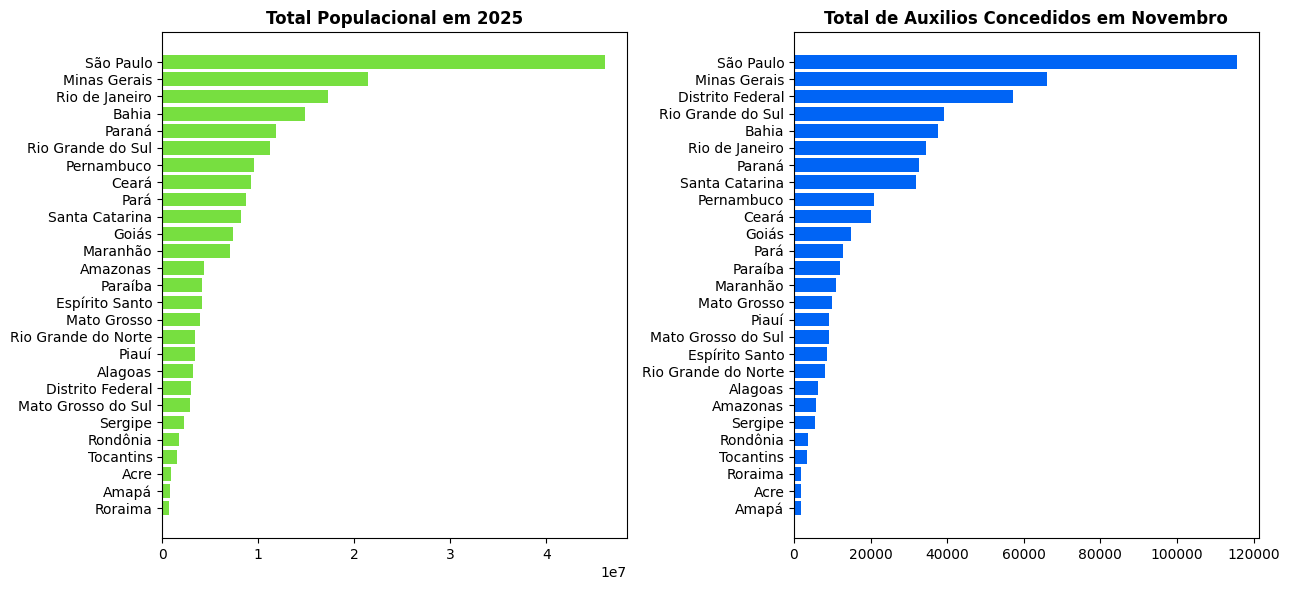

In [248]:
#Exibe o total de população e concessão

fig = plt.figure(figsize=(13, 6))

ax1 = plt.subplot2grid((1, 2), (0, 0))
ax1.barh(populacao['Unidade da Federação'], populacao['População_residente'], color='#77DF40')
ax1.set_title('Total Populacional em 2025', fontweight='bold')
ax1.set_ylabel('')
ax1.invert_yaxis()


ax2 = plt.subplot2grid((1, 2), (0, 1))
ax2.barh(df_auxilios_por_UF['UF'], df_auxilios_por_UF['Total de Auxilios Concedidos'], color='#0064F5')

ax2.set_title('Total de Auxilios Concedidos em Novembro', fontweight='bold')
ax2.set_ylabel('')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()


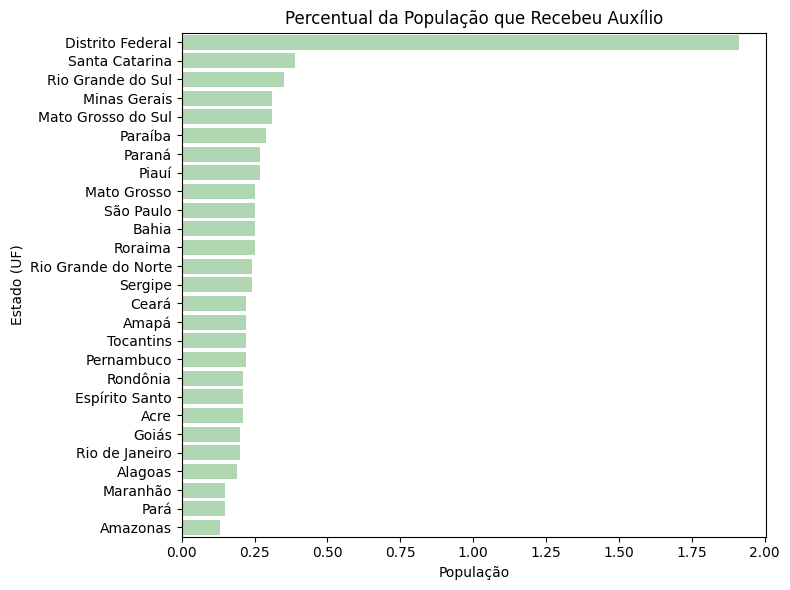

In [249]:
#Exibe o percentual de auxilios distribuidos comparado com a população
plt.figure(figsize=(8,6))
sns.barplot(
    data=comparacao,
    y='UF',
    x='porcentagem_auxilio',
    color='#A8DCAB',
)
plt.title('Percentual da População que Recebeu Auxílio')
plt.xlabel('População')
plt.ylabel('Estado (UF)')
plt.tight_layout()
plt.show()

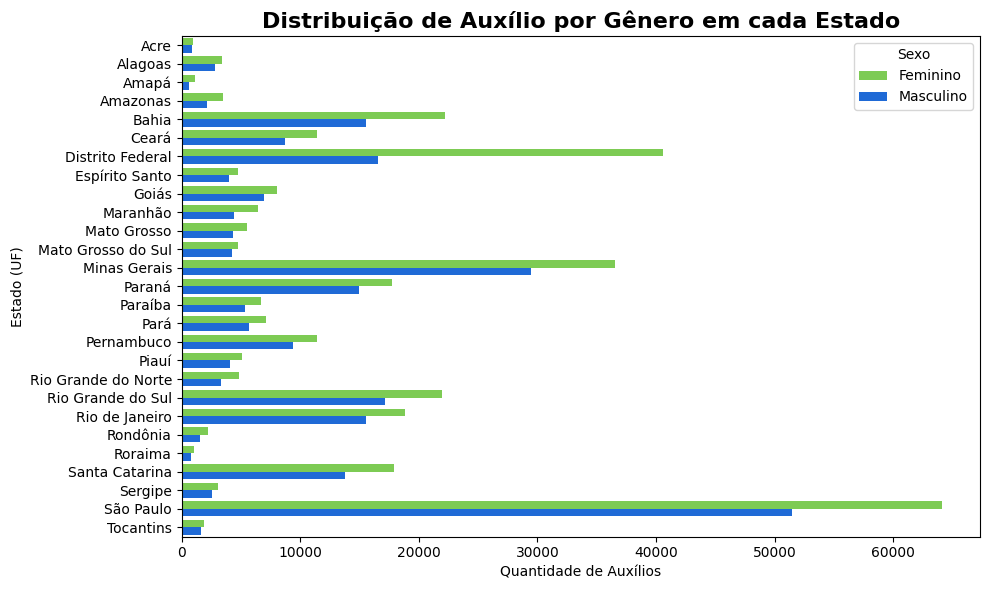

In [250]:
#Exibe a comparação de distribuição de auxilio por gênero em cada Estado
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_generos_por_UF,
    y='UF',
    x='Total de Auxilios Concedidos',
    hue='Sexo',
    palette=['#77DF40', '#0064F5']
)
plt.title('Distribuição de Auxílio por Gênero em cada Estado', fontweight='bold',fontsize=16)
plt.xlabel('Quantidade de Auxílios')
plt.ylabel('Estado (UF)')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

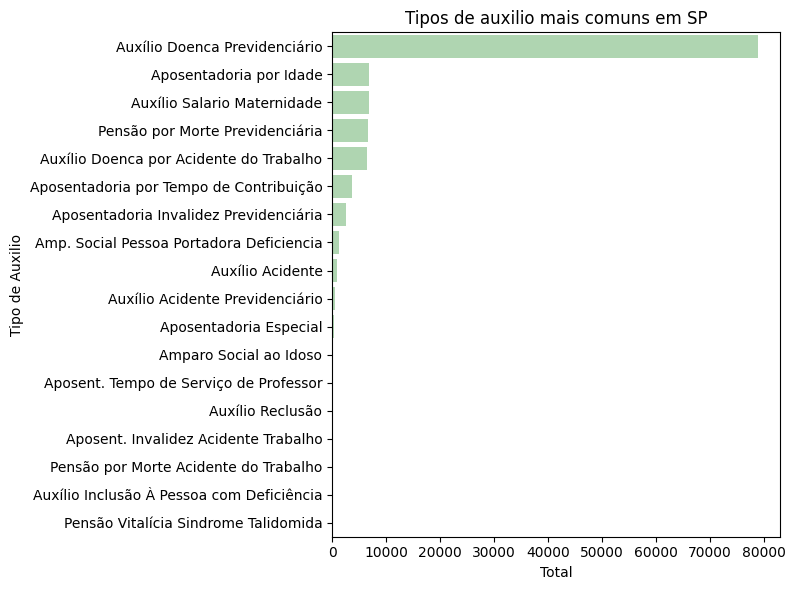

In [251]:
#Exibe os tipos de auxilio mais comuns no estado de sp
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_SP,
    y='Tipo de auxilio',
    x='Total',
    color='#A8DCAB',
)
plt.title('Tipos de auxilio mais comuns em SP')
plt.xlabel('Total')
plt.ylabel('Tipo de Auxilio')
plt.tight_layout()
plt.show()

## 2. ANÁLISE TEMPORAL

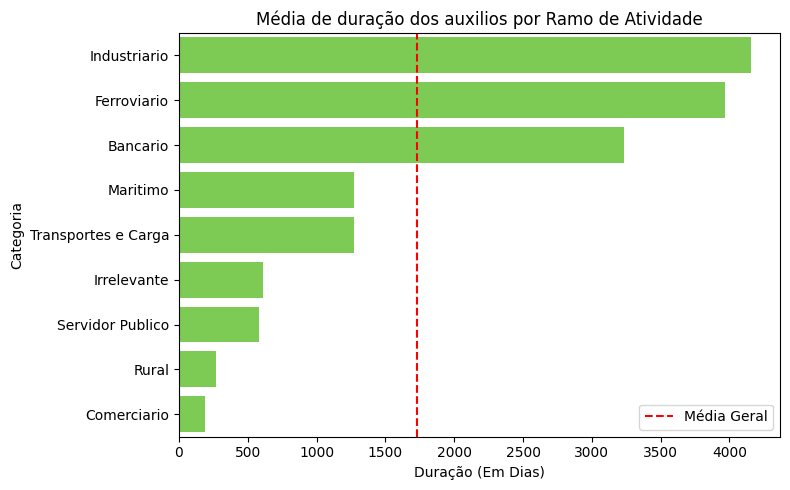

In [252]:
#Exibe Média de duração dos auxilios por Ramo de Atividade
plt.figure(figsize=(8,5))
sns.barplot(
    data=df_media_profissao,
    y='Ramo Atividade',
    x='Duração',
    color='#77DF40',
)

plt.axvline(x=df_media_profissao['Duração'].mean(), color='red', linestyle='--', 
            label=f'Média Geral')

plt.title('Média de duração dos auxilios por Ramo de Atividade')
plt.xlabel('Duração (Em Dias)')
plt.ylabel('Categoria')
plt.legend()
plt.tight_layout()
plt.show()

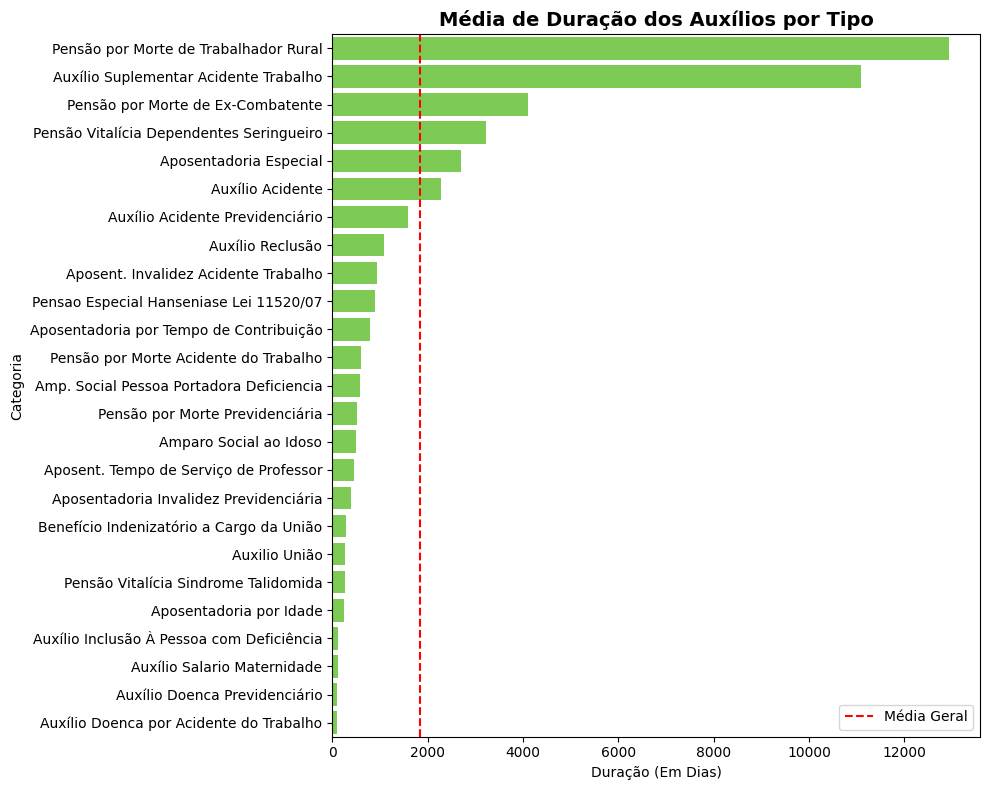

In [253]:
#Média de duração dos auxilios por Tipo
plt.figure(figsize=(10,8))
sns.barplot(
    data=df_media_categoria,
    y='Tipos de auxilio',
    x='Duração',
    color='#77DF40',
)

plt.axvline(x=df_media_categoria['Duração'].mean(), color='red', linestyle='--', 
            label=f'Média Geral')

plt.title('Média de Duração dos Auxílios por Tipo', fontsize=14, fontweight='bold')
plt.xlabel('Duração (Em Dias)')
plt.ylabel('Categoria')
plt.legend()
plt.tight_layout()
plt.show()

## 3. ANÁLISE DEMOGRAFICA

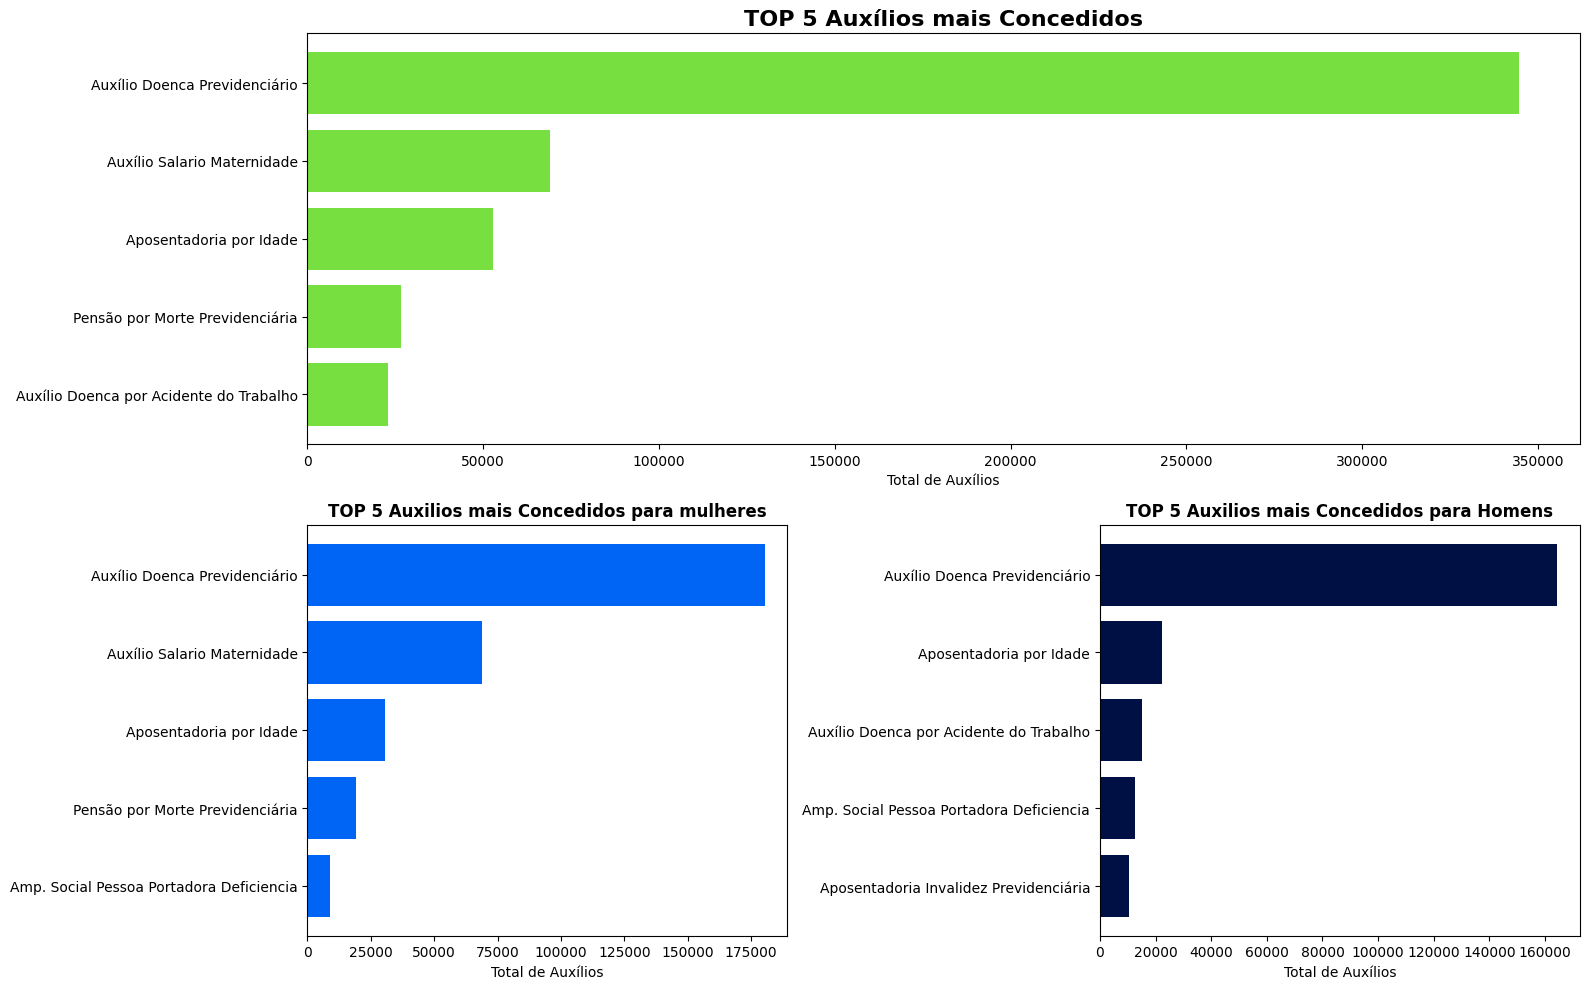

In [254]:
#Exibe o Top 5 auxilios mais concedidos
fig = plt.figure(figsize=(16, 10))

ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
ax1.barh(top5_geral['Tipo'], top5_geral['Total de Auxílios'], color='#77DF40')
ax1.set_title('TOP 5 Auxílios mais Concedidos', fontsize=16,fontweight='bold')
ax1.set_xlabel('Total de Auxílios')
ax1.invert_yaxis()

ax2 = plt.subplot2grid((2, 2), (1, 0))
ax2.barh(top5_mulheres['Tipo'], top5_mulheres['Total de Auxílios'], color='#0064F5')
ax2.set_title('TOP 5 Auxilios mais Concedidos para mulheres', fontweight='bold')
ax2.set_xlabel('Total de Auxílios')
ax2.invert_yaxis()

ax3 = plt.subplot2grid((2, 2), (1, 1))
ax3.barh(top5_homens['Tipo'], top5_homens['Total de Auxílios'], color='#000F44')
ax3.set_title('TOP 5 Auxilios mais Concedidos para Homens', fontweight='bold')
ax3.set_xlabel('Total de Auxílios')
ax3.invert_yaxis()

plt.tight_layout()
plt.show()

In [255]:
#Pergunta: O grau de instrução influencia o valor e a duração do benefício?
print(auxilios['Grau Instrução'].value_counts())

Grau Instrução
Não Informado                                    446403
5ª. a 8ª. Série Incompl. do 1º. Grau   (Ginás     41222
2º. Grau (Colegial) Completo                      32279
1º. Grau (Ginasial) Completo                      25260
2º. Grau (Colegial) Incompleto                    10374
Superior Completo                                  9694
Analfabeto                                         7263
Ate 4ª. Série 1º. Grau(Primário) Incompleta        3378
Superior Incompleto                                2835
4ª. Série 1ª. Grau Completa                        2095
Name: count, dtype: int64


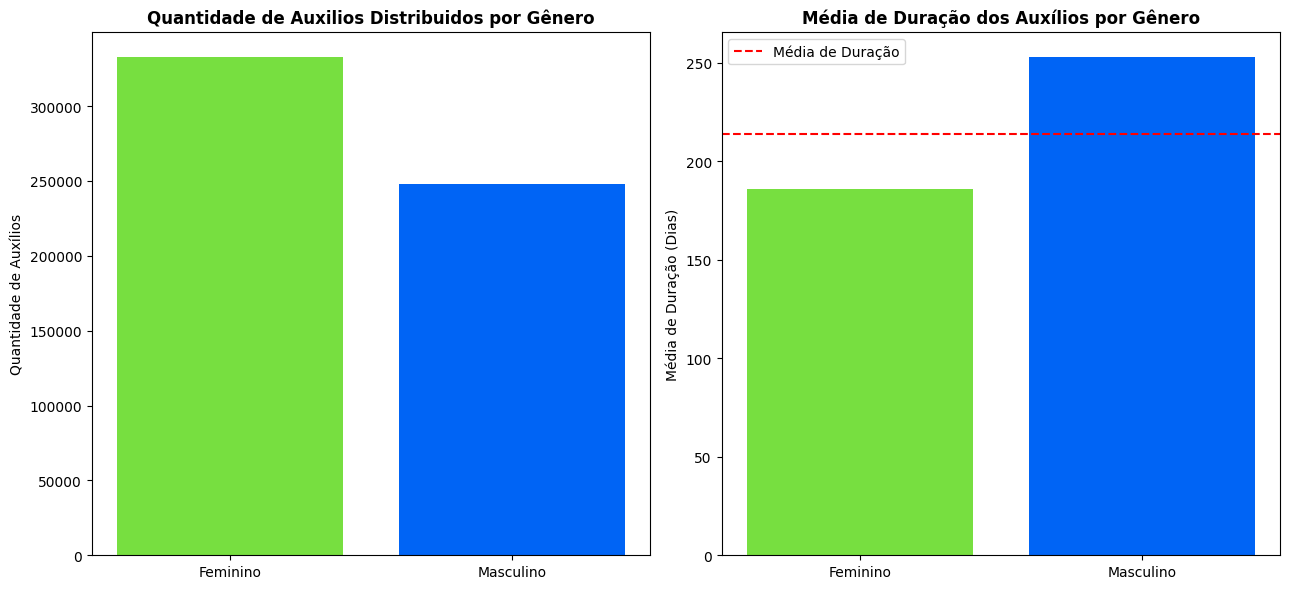

In [256]:
#Exibe a quantidade, a média de duração e a média de RMI por gênero

fig = plt.figure(figsize=(13, 6))

ax1 = plt.subplot2grid((1, 2), (0, 0))
ax1.bar(juncao_medidas_genero['Categoria'], juncao_medidas_genero['Total de Auxílios'], color=['#77DF40','#0064F5'])
ax1.set_title('Quantidade de Auxilios Distribuidos por Gênero',fontweight='bold')
ax1.set_ylabel('Quantidade de Auxílios')


ax2 = plt.subplot2grid((1, 2), (0, 1))
ax2.bar(juncao_medidas_genero['Categoria'], juncao_medidas_genero['Média de Duração'], color=['#77DF40','#0064F5'])
ax2.axhline(y=media_duracao_auxilios, 
            color='red', 
            linestyle='--', 
            label=f'Média de Duração')
ax2.legend()
ax2.set_title('Média de Duração dos Auxílios por Gênero', fontweight='bold')
ax2.set_ylabel('Média de Duração (Dias)')

plt.tight_layout()
plt.show()

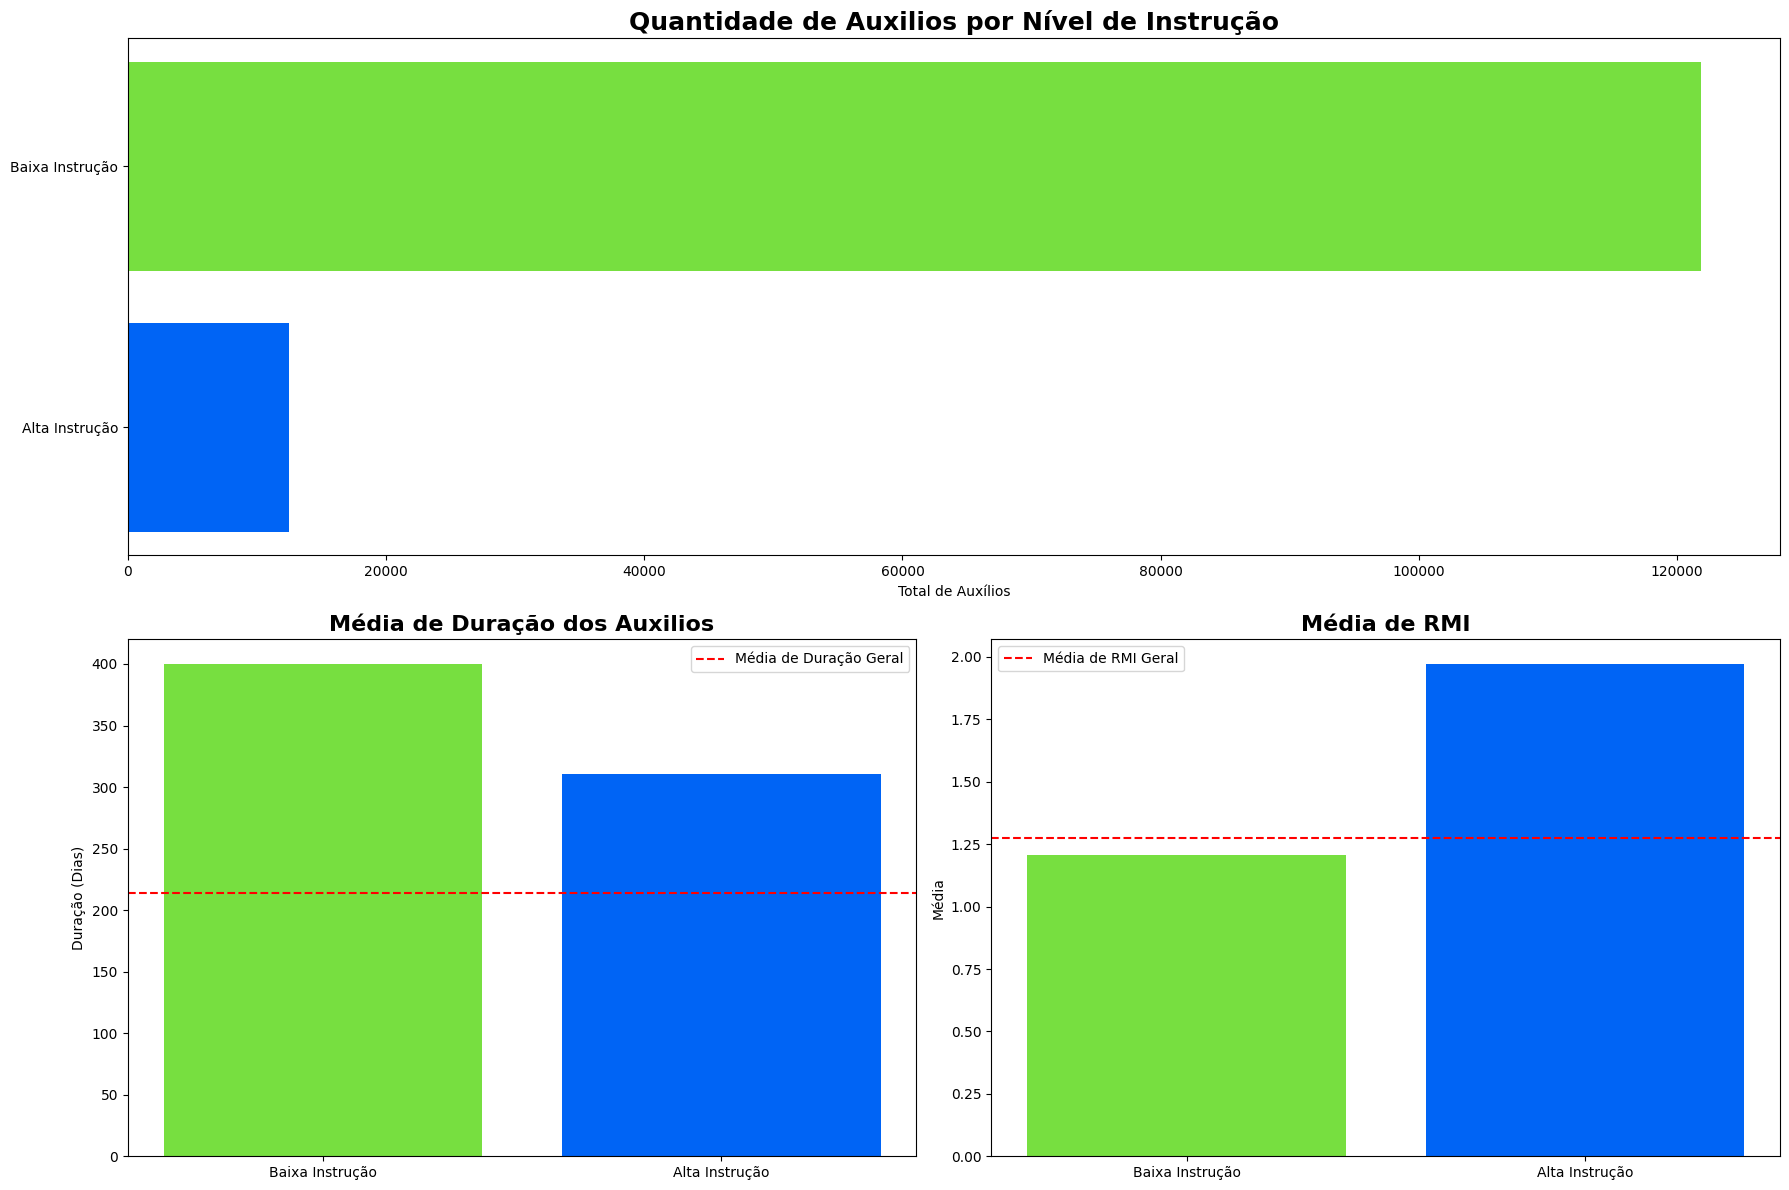

In [257]:
##Exibir Quantidade, média RMI e média de duração por instrução

fig = plt.figure(figsize=(18, 12))

ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
ax1.barh(df_media_instrucao['Nível de Instrução'], df_media_instrucao['Quantidade de auxilios'], color=['#77DF40','#0064F5'])
ax1.set_title('Quantidade de Auxilios por Nível de Instrução', fontweight='bold', fontsize=18)
ax1.set_xlabel('Total de Auxílios')
ax1.invert_yaxis()

ax2 = plt.subplot2grid((2, 2), (1, 0))
ax2.bar(df_media_instrucao['Nível de Instrução'], df_media_instrucao['Média Duração'], color=['#77DF40','#0064F5'])
ax2.axhline(y=media_duracao_auxilios, 
            color='red', 
            linestyle='--', 
            label=f'Média de Duração Geral')
ax2.legend()
ax2.set_title('Média de Duração dos Auxilios', fontweight='bold', fontsize=16)
ax2.set_ylabel('Duração (Dias)')

ax3 = plt.subplot2grid((2, 2), (1, 1))
ax3.bar(df_media_instrucao['Nível de Instrução'], df_media_instrucao['Média RMI'], color=['#77DF40','#0064F5'])
ax3.axhline(y=media_rmi, 
            color='red', 
            linestyle='--', 
            label=f'Média de RMI Geral')
ax3.legend()
ax3.set_title('Média de RMI', fontweight='bold', fontsize=16)
ax3.set_ylabel('Média')

plt.tight_layout()
plt.show()

In [258]:
#Pessoas com dependentes recebem a mais?
print(auxilios['Vínculo dependentes'].value_counts())

Vínculo dependentes
Não Informado    490280
Filho             68125
Cônjuge           16403
Companheiro        5390
Ex-Cônjuge          229
Filho Adotivo       140
Pai/Mãe              85
Dep. Judicial        79
Designado            70
Irmão                 2
Name: count, dtype: int64


In [259]:
# Agrupar por vínculo de dependentes e calcular a média de RMI
media_rmi_dependentes = (
    auxilios.groupby('Vínculo dependentes')['Quant salarios minimos na RMI']
    .mean()
    .reset_index()
)
media_rmi_dependentes.columns = ['Vínculo dependentes', 'Média RMI']

print(media_rmi_dependentes)

  Vínculo dependentes  Média RMI
0          Companheiro   1.374831
1              Cônjuge   1.474678
2        Dep. Judicial   1.796709
3            Designado   3.596143
4           Ex-Cônjuge   3.096681
5                Filho   1.078885
6        Filho Adotivo   1.969929
7                Irmão   1.000000
8        Não Informado   1.292694
9              Pai/Mãe   1.312941
